In [6]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10
import warnings
warnings.simplefilter("ignore", np.ComplexWarning)

## CIFAR - 10

CIFAR-10 je súbor RGB obrázkov, ktoré sú označené jednou z 10 tried. Bol vyvinutý výskumníkmi z Kanadského inštitútu pre pokročilý výskum (CIFAR). Súbor pozostáva z 60 000 farebných trénovacích obrázkov veľkosti 32x32 a 10 000 testovacích obrázkov, pričom v každej z 10 tried je 6 000 obrázkov. Triedy sú lietadlo, automobil, vták, mačka, jeleň, pes, žaba, kôň, loď a kamión.

Keďže pracujeme s farebnými obrázkami redukciu dimenzií pomocou PCA vykonáme pre každý farebný kanál zvlášť a na konci kanály zlúčime.

In [22]:
test_set = CIFAR10('./data', train=False, download=True)
test_set = test_set.data[:2000].astype(np.float32)

Files already downloaded and verified


In [23]:
print(test_set.shape)
print(type(test_set[0]))
test_set[0]

(2000, 32, 32, 3)
<class 'numpy.ndarray'>


array([[[158., 112.,  49.],
        [159., 111.,  47.],
        [165., 116.,  51.],
        ...,
        [137.,  95.,  36.],
        [126.,  91.,  36.],
        [116.,  85.,  33.]],

       [[152., 112.,  51.],
        [151., 110.,  40.],
        [159., 114.,  45.],
        ...,
        [136.,  95.,  31.],
        [125.,  91.,  32.],
        [119.,  88.,  34.]],

       [[151., 110.,  47.],
        [151., 109.,  33.],
        [158., 111.,  36.],
        ...,
        [139.,  98.,  34.],
        [130.,  95.,  34.],
        [120.,  89.,  33.]],

       ...,

       [[ 68., 124., 177.],
        [ 42., 100., 148.],
        [ 31.,  88., 137.],
        ...,
        [ 38.,  97., 146.],
        [ 13.,  64., 108.],
        [ 40.,  85., 127.]],

       [[ 61., 116., 168.],
        [ 49., 102., 148.],
        [ 35.,  85., 132.],
        ...,
        [ 26.,  82., 130.],
        [ 29.,  82., 126.],
        [ 20.,  64., 107.]],

       [[ 54., 107., 160.],
        [ 56., 105., 149.],
        [ 45.,  

In [29]:
test_set /= 255
print(test_set.max())

0.003921569


In [30]:
red, green, blue = test_set[:,:,:,0], test_set[:,:,:,1], test_set[:,:,:,2]

In [31]:
# flatten the images and create a matrix
red.shape

(2000, 32, 32)

### 2.) a.

In [39]:
covs = []

for ch in [red, green, blue]:
    ch = ch.reshape(2000, 32*32)
    covs.append(np.cov(ch))

eigens = [(np.linalg.eig(cov.astype(np.float32))) for cov in covs]

variances = [eigenvalues / eigenvalues.sum() for eigenvalues, _ in eigens]

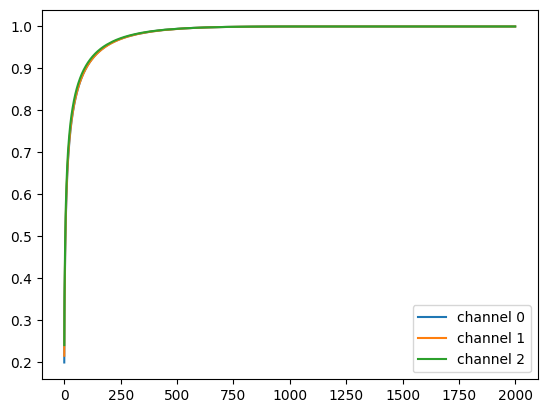

In [40]:
# plot the cumulative variance vs the number of components for each channel
for i, var in enumerate(variances):
    plt.plot(np.cumsum(var), label=f'channel {i}')
plt.legend()
plt.show()

### 2.) b.

The error of p = 50 equals: 0.8639758604406641
The error of p = 250 equals: 4.17942990630336
The error of p = 500 equals: 17.992857915387738


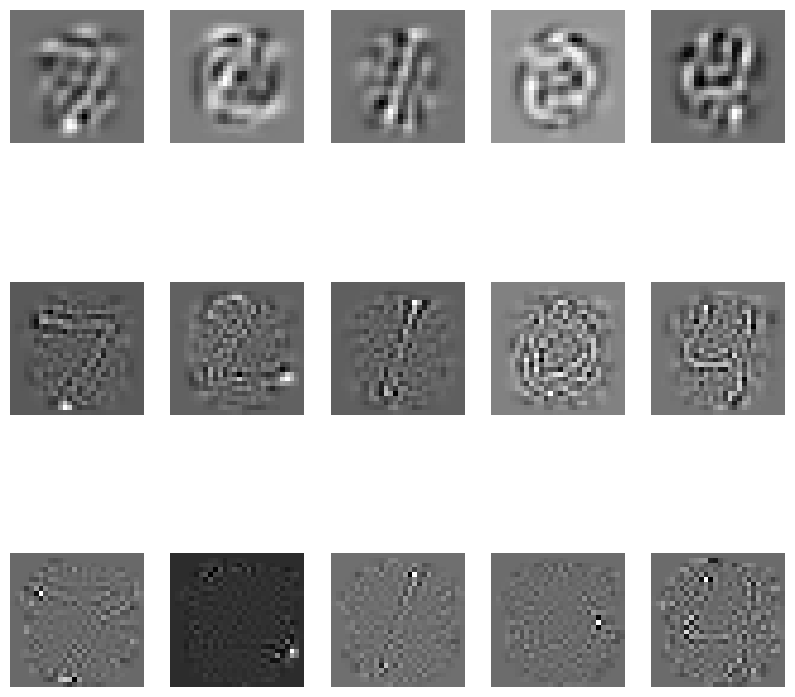

In [ ]:
p =  [50, 250, 500]
off = 0
plt.figure(figsize=(10, 10))
for i in p:
    eigenvalues_p = eigenvalues[:i]
    eigenvectors_p = eigenvectors[:, :i]

    # calculate the projection matrix
    projection_matrix = eigenvectors_p @ np.diag(eigenvalues_p ** -0.5)

    # project the data
    projected_data = test_set_array.T @ projection_matrix

    # reconstruct the data
    reconstructed_data = projected_data @ projection_matrix.T

    # calculate the error
    error = np.linalg.norm(test_set_array - reconstructed_data.T) / np.linalg.norm(test_set_array)
    print(f"The error of p = {i} equals: {error}")

    # visualize the images
    for j in range(5):
        plt.subplot(3, 5, j + off + 1)
        plt.imshow(reconstructed_data.T[j].astype(np.float64).reshape(28, 28), cmap='gray')
        plt.axis('off')
    off += 5
plt.show()